In [3]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

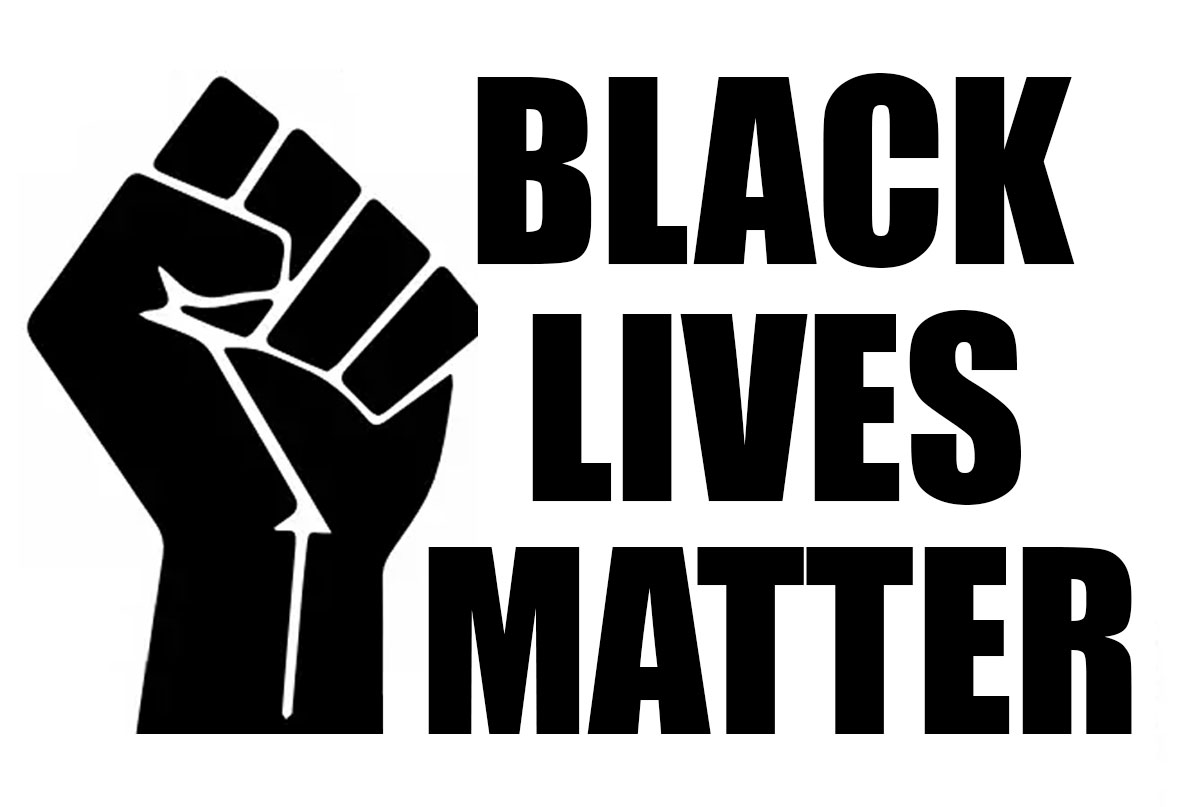

In [4]:
from IPython.display import Image
Image(filename='blacklivesmatter-1.jpeg')

In [5]:
blm = pd.read_csv('blacklivesmatter.csv')

In [6]:
blm.head()

,TWEET,COMMENTS,LIKES,RETWEETS
0,Tonight’s debate made something clear. We have...,404,9.6K,2.6K
1,"Thanks so much for the work you’ve done, AND w...",13,276,38
2,It’s the thing we’ve been doing for the last 5...,97,2.9K,694
3,We’ve launched a new website to get you out to...,24,326,102
4,Voter registration deadlines for today! Kans...,37,671,435


In [7]:
blm.shape

(758, 4)

In [8]:
blm.isnull().sum()

TWEET        3
COMMENTS    82
LIKES        0
RETWEETS     0
dtype: int64

In [ ]:
#Filling the empty tweets with the stopword 'and', as the stopwords get removed ahead in the code

In [9]:
blm['TWEET'].fillna('and', inplace =True)

In [10]:
blm.isnull().sum()

TWEET        0
COMMENTS    82
LIKES        0
RETWEETS     0
dtype: int64

In [11]:
blm_tweets = blm['TWEET']

In [12]:
type(blm_tweets)

pandas.core.series.Series

In [13]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [14]:
import spacy

In [15]:
blm_tweets.head()

0    Tonight’s debate made something clear. We have...
1    Thanks so much for the work you’ve done, AND w...
2    It’s the thing we’ve been doing for the last 5...
3    We’ve launched a new website to get you out to...
4    Voter registration deadlines for today!   Kans...
Name: TWEET, dtype: object

In [16]:
tweets = []

for tweet in blm_tweets:
    tweets.append(tweet)

In [17]:
sentences = []

for twt in tweets:
    snts = twt.split()
    sentences.append(snts)

In [19]:
words = []

for i in sentences:
    for k in i:
        words.append(k)

In [20]:
words[:11]

['Tonight’s',
 'debate',
 'made',
 'something',
 'clear.',
 'We',
 'have',
 'to',
 'do',
 'more',
 'than']

In [ ]:
# words is a list of all the words that the tweets consists of

In [21]:
len(words)

19293

In [ ]:
# As you can see above that the 'words' list is filled with 19293 words from the 758 tweets

# HASHTAGS

In [22]:
hshtgs = []
words_list = []

for j in words:
    if j.startswith('#'):
        hshtgs.append(j)
    else:
        words_list.append(j)              

In [23]:
len(hshtgs)

1683

In [ ]:
# This shows that about 1683 hashtags were used in these tweets

In [25]:
hshtgs[:15]

['#Debates2020',
 '#BreatheAct',
 '#DivestInvest',
 '#CreateYourFuture',
 '#DoWhatchaLike',
 '#NewProfilePic',
 '#BlackLivesMatter',
 '#EndSars',
 '#EndSARS',
 '#Nigeria.',
 '#BlackLivesMatter',
 '#EndSarsNow',
 '#VPDebate',
 '#M4BL',
 '#WhatMatters2020']

In [ ]:
# Converting all the hashtags to lowercase

In [26]:
hshtgs = [x.lower() for x in hshtgs]

In [27]:
hshtgs[:11]

['#debates2020',
 '#breatheact',
 '#divestinvest',
 '#createyourfuture',
 '#dowhatchalike',
 '#newprofilepic',
 '#blacklivesmatter',
 '#endsars',
 '#endsars',
 '#nigeria.',
 '#blacklivesmatter']

In [30]:
# # Removing the '#' from the hashtags

main_tags = []

for tgs in hshtgs:
    tgs = tgs.replace('#',"")
    main_tags.append(tgs)

In [31]:
main_tags[:11]

['debates2020',
 'breatheact',
 'divestinvest',
 'createyourfuture',
 'dowhatchalike',
 'newprofilepic',
 'blacklivesmatter',
 'endsars',
 'endsars',
 'nigeria.',
 'blacklivesmatter']

In [32]:
len(main_tags)

1683

In [33]:
tags_str = []

for sr in main_tags:
    sr = str(sr)
    tags_str.append(sr)

In [34]:
len(tags_str)

1683

In [35]:
# Removing Punctuations from the 'tags' list which consists of hashtags

import re
tags_str = [re.sub(r'[^A-Za-z0-9]+','', x) for x in tags_str]

In [36]:
type(tags_str[0])

str

In [37]:
from wordcloud import WordCloud

In [39]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(str(tags_str))

# HASHTAGS WORDCLOUD

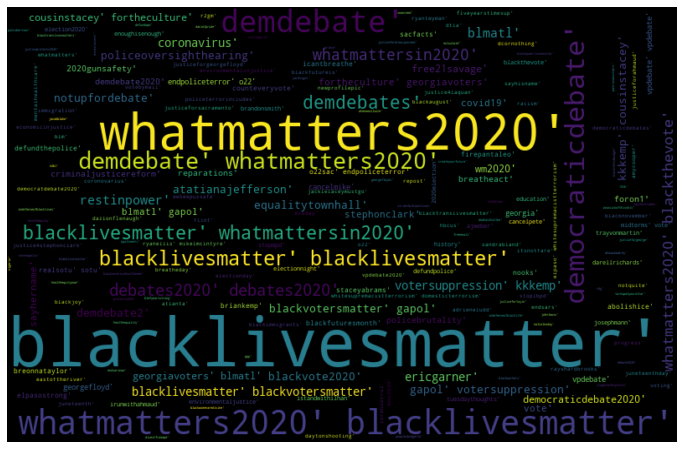

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,8))
plt.imshow(wordcloud, interpolation='bilinear', aspect ='auto')
plt.axis("off")
plt.savefig('blm_hashtag_wordcloud.png', dpi=100)
plt.show()

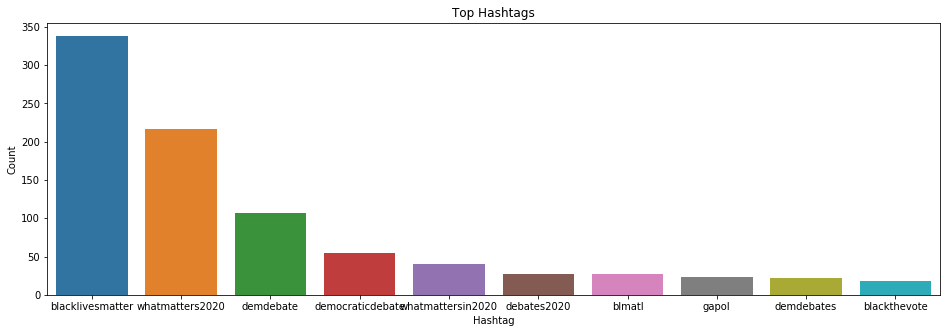

In [48]:
import seaborn as sns
a = nltk.FreqDist(tags_str)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
plt.title('Top Hashtags')
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.savefig('blm_top_hashtags.png', dpi=100)
plt.show()

In [51]:
hashtag_freq_list = d

In [52]:
hashtag_freq_list

,Hashtag,Count
6,blacklivesmatter,338
12,whatmatters2020,216
107,demdebate,107
105,democraticdebate,55
191,whatmattersin2020,40
0,debates2020,27
263,blmatl,27
264,gapol,23
110,demdebates,22
97,blackthevote,18


In [ ]:
# As the punctuations have been removed, now let's remove the stopwords from the words list 

In [53]:
import re
words_list = [re.sub(r'[^A-Za-z0-9]+','', x.lower()) for x in words_list] 

In [54]:
all_words = []
for m in words_list:
    if m != "":
        all_words.append(m)
        

In [55]:
len(all_words)

17386

In [56]:
import nltk
from nltk.corpus import stopwords
stp = stopwords.words('english')

In [57]:
filter_words = []

for i in all_words:
    if i in stp:
        pass
    else:
        filter_words.append(i)

In [58]:
len(filter_words)

10244

In [ ]:
# I did not use stemming to bring down the words to their root words because
# some of the stemmed words seemed not correct
# Hence I removed the idea of Stemming

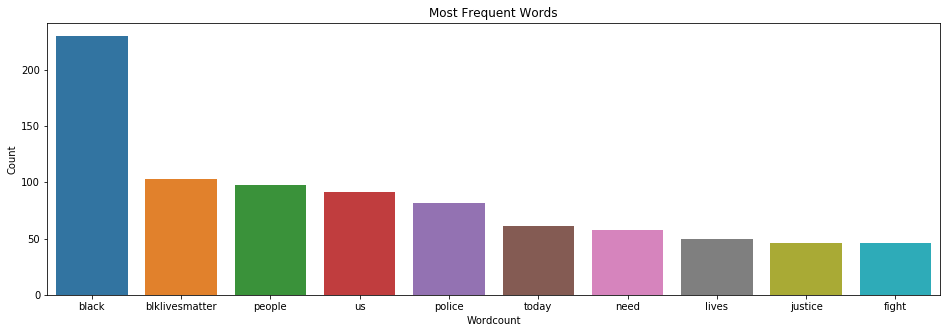

In [59]:
aa = nltk.FreqDist(filter_words)
dd = pd.DataFrame({'Wordcount': list(aa.keys()),
                  'Count': list(aa.values())})
# selecting top 10 most frequent hashtags     
dd = dd.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
plt.title('Most Frequent Words')
ax = sns.barplot(data=dd, x= "Wordcount", y = "Count")
ax.set(ylabel = 'Count')
plt.savefig('blm_all_freq.png', dpi=100)
plt.show()

In [60]:
blm_freq_list = dd

In [61]:
blm_freq_list

,Wordcount,Count
171,black,230
303,blklivesmatter,103
73,people,98
35,us,91
102,police,82
57,today,61
6,need,58
291,lives,50
88,justice,46
232,fight,46


In [62]:
wrdcld = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(str(filter_words))

# WORDCLOUD FOR ALL THE WORDS IN THE TWEETS

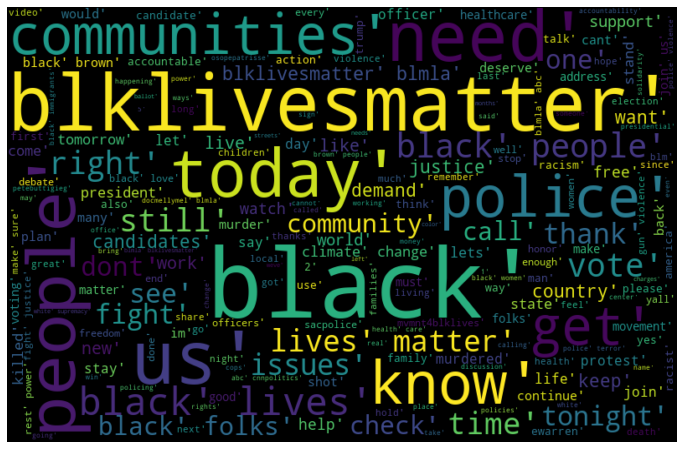

In [63]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,8))
plt.imshow(wrdcld, interpolation='bilinear', aspect ='auto')
plt.axis("off")
plt.savefig('blm_most_freq_wordcloud.png', dpi=100)
plt.show()